# Tool to extract usefull information from mlperf trace

In [1]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [2]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [3]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [5]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,3.666000e+03,2444.000000,1222.0,1.222000e+03,1222.000000
mean,3.035688e+07,24584.246753,0.0,4.911878e+07,0.049119
std,1.730173e+07,24905.194417,0.0,5.661994e+06,0.005662
min,2.013742e+05,4.001000,0.0,4.263382e+07,0.042634
25%,1.542324e+07,7.556250,0.0,4.687617e+07,0.046876
50%,3.037716e+07,21361.618500,0.0,4.795588e+07,0.047956
75%,4.535893e+07,47983.724250,0.0,4.918120e+07,0.049181
max,6.028378e+07,95253.161000,0.0,9.521015e+07,0.095210


In [6]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [7]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,2.013742e+05,Sample,NaN,0.0,55321568.0,0.055322
2,2.013753e+05,IssueQuery,55384.952,NaN,NaN,NaN
1,2.566971e+05,QuerySamplesComplete,12.573,NaN,NaN,NaN
3,2.567652e+05,Sample,NaN,0.0,58078673.0,0.058079
5,2.567672e+05,IssueQuery,58118.489,NaN,NaN,NaN
...,...,...,...,...,...,...
3662,6.018285e+07,IssueQuery,52532.332,NaN,NaN,NaN
3661,6.023534e+07,QuerySamplesComplete,6.843,NaN,NaN,NaN
3663,6.023539e+07,Sample,NaN,0.0,48388456.0,0.048388
3665,6.023539e+07,IssueQuery,48430.350,NaN,NaN,NaN


In [32]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,2.099840e+05,Sample,NaN,0.0,685275901.0,0.685276
3,8.953257e+05,Sample,NaN,0.0,599451835.0,0.599452
6,1.494826e+06,Sample,NaN,0.0,756946142.0,0.756946
9,2.251817e+06,Sample,NaN,0.0,566683002.0,0.566683
12,2.818551e+06,Sample,NaN,0.0,509243135.0,0.509243
...,...,...,...,...,...,...
3057,1.975822e+08,Sample,NaN,0.0,248935453.0,0.248935
3060,1.978312e+08,Sample,NaN,0.0,153147064.0,0.153147
3063,1.979844e+08,Sample,NaN,0.0,221125380.0,0.221125
3066,1.982055e+08,Sample,NaN,0.0,201303496.0,0.201303


In [9]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
2,2.013753e+05,IssueQuery,55384.952,NaN,NaN,NaN
5,2.567672e+05,IssueQuery,58118.489,NaN,NaN,NaN
8,3.148922e+05,IssueQuery,51121.360,NaN,NaN,NaN
11,3.660200e+05,IssueQuery,51665.874,NaN,NaN,NaN
14,4.176924e+05,IssueQuery,53961.147,NaN,NaN,NaN
...,...,...,...,...,...,...
3653,6.003759e+07,IssueQuery,49289.454,NaN,NaN,NaN
3656,6.008689e+07,IssueQuery,49251.262,NaN,NaN,NaN
3659,6.013615e+07,IssueQuery,46698.104,NaN,NaN,NaN
3662,6.018285e+07,IssueQuery,52532.332,NaN,NaN,NaN


In [10]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [11]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
1,2.566971e+05,QuerySamplesComplete,12.573,NaN,NaN,NaN
4,3.148454e+05,QuerySamplesComplete,8.130,NaN,NaN,NaN
7,3.659719e+05,QuerySamplesComplete,7.593,NaN,NaN,NaN
10,4.176439e+05,QuerySamplesComplete,7.886,NaN,NaN,NaN
13,4.716134e+05,QuerySamplesComplete,7.403,NaN,NaN,NaN
...,...,...,...,...,...,...
3652,6.008684e+07,QuerySamplesComplete,7.530,NaN,NaN,NaN
3655,6.013610e+07,QuerySamplesComplete,6.770,NaN,NaN,NaN
3658,6.018280e+07,QuerySamplesComplete,7.413,NaN,NaN,NaN
3661,6.023534e+07,QuerySamplesComplete,6.843,NaN,NaN,NaN


# singlestream scenario

In [128]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"
all_files = glob.glob(path + "*SS.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,cpumemory,32,1,singlestream,1,1,20.273870,0.049246,0.048091,0.049592,0.050968,0.054182,0.085313,0.095775
1,resnet,cpumemory,32,1,singlestream,1,2,20.442541,0.048839,0.047821,0.049382,0.050844,0.054171,0.075198,0.081899
2,resnet,cpumemory,32,1,singlestream,1,3,20.395046,0.048952,0.047902,0.049423,0.050927,0.054413,0.081702,0.086068
3,resnet,cpumemory,32,1,singlestream,1,4,20.368848,0.049016,0.047935,0.049575,0.050949,0.056027,0.081441,0.091297
4,resnet,cpumemory,32,1,singlestream,1,5,20.555242,0.048572,0.047610,0.049091,0.050186,0.052311,0.082298,0.091760


In [129]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,cpumemory,32,1,singlestream,1,1,20.273870,0.049246,0.048091,0.049592,0.050968,0.054182,0.085313,0.095775
1,resnet,cpumemory,32,1,singlestream,1,2,20.442541,0.048839,0.047821,0.049382,0.050844,0.054171,0.075198,0.081899
2,resnet,cpumemory,32,1,singlestream,1,3,20.395046,0.048952,0.047902,0.049423,0.050927,0.054413,0.081702,0.086068
3,resnet,cpumemory,32,1,singlestream,1,4,20.368848,0.049016,0.047935,0.049575,0.050949,0.056027,0.081441,0.091297
4,resnet,cpumemory,32,1,singlestream,1,5,20.555242,0.048572,0.047610,0.049091,0.050186,0.052311,0.082298,0.091760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,singlestream,1,6,20.684970,0.048266,0.047295,0.048720,0.050042,0.052038,0.084027,0.090913
126,resnet,baseline,32,1,singlestream,1,7,20.682882,0.048276,0.047310,0.048747,0.050040,0.052200,0.085396,0.092714
127,resnet,baseline,32,1,singlestream,1,8,20.839927,0.047907,0.046988,0.048385,0.049475,0.050950,0.087749,0.094739
128,resnet,baseline,32,1,singlestream,1,9,20.766678,0.048083,0.046941,0.048375,0.049420,0.051013,0.088845,0.095861


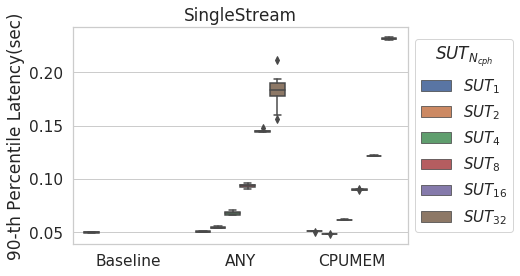

In [174]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
color=["blue","green","yellow","red","orange","grey"]

for x in ['p90']:
    for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #                          |\
    #                          (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
    #                 print(dfg_bench)
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.legend(legend,prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel("90-th Percentile Latency(sec)")
            plt.title("SingleStream")
            plt.savefig('ss-metric.pdf',bbox_inches='tight')  
            plt.show()


In [131]:
#y is the issue_start_ns
# df1 = df[df["name"].isin(["Sample"])]
# df1.reset_index(drop=True,inplace=True)
# ax = df1['issue_start_ns'].plot(figsize=figsize)
# ax.set(xlim=(0, 25000))
# ax.set_title('issue start time (usec)');

In [88]:
# df1['issue_start_ns'].sort_values

In [89]:
# df_time=df1['issue_start_ns'].shift()
# df_time
# df_time.dtype

In [90]:
#time poisson
# ax = df_time.plot(figsize=figsize)
# ax.set(xlim=(0, 10000))
# ax.set_title('issue start time (usec)');

In [91]:
# color=["blue","green","yellow","red","orange","grey"]
# x=0
# for add in ['none-resnet-1-32-S-1-10','none-resnet-2-32-S-1-10'
#             ,'none-resnet-4-32-S-1-10',
#            'none-resnet-8-32-S-1-10','none-resnet-16-32-S-1-10','none-resnet-32-32-S-1-10']:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(max(df1['dur']))
# #     df1['delta'] = df1['ts'].diff()
# #     plt.hist(df1['dur'], 50, density=True, facecolor='g', alpha=0.75)
#     ax = df1['dur'].plot.hist(bins=HIST_BINS, alpha=0.5, figsize=figsize, fc=color[x])
#     ax.set_title('IssueQuery duration (usec)');
#     x = x+1
#     plt.show()

In [92]:
# df1 = df[df["name"].isin(["IssueQuery"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# print(max(df1['dur']))
# ax.set_title('IssueQuery duration (usec)');
# # ax.set(xlim=(0, 80000))
# plt.show()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between IssueQuery (usec)');

# # df1['delta'].describe()

In [93]:
# for SingleStream
if True:
    df1 = df[df["name"].isin(["QuerySamplesComplete"])]
    ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    ax.set_title('Inference time (usec)');
    plt.show()
    ax = df1['dur'].plot(figsize=figsize)
    ax.set(ylim=(0, 600))
    ax.set_title('Individual inference time (usec)');

KeyError: 'name'

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
40.694
8.156
8.408997656249996
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
45.148
7.933
8.420616406249996
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
54.688
7.4515
7.909151562499986
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
62.766
7.493
7.817918750000004
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
302.967
8.11
8

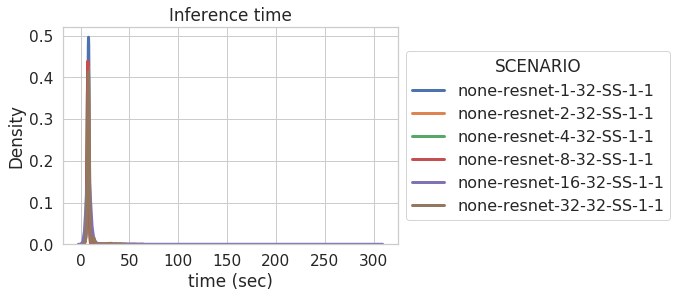

cpumem


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-1-32-SS-1-1/mlperf_log_trace.json'

In [94]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]

for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-1',
          sc+'-resnet-2-32-SS-1-1',
             sc+'-resnet-4-32-SS-1-1',
               sc+'-resnet-8-32-SS-1-1',
          sc+'-resnet-16-32-SS-1-1',
          sc+'-resnet-32-32-SS-1-1']
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(max(df1['dur']))
        print(np.median(df1['dur']))
        print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['dur'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time')
    plt.xlabel('time (sec)')
    plt.ylabel('Density')
    plt.show()

In [ ]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=["baseline","ANY-1ctn","ANY-2ctn","ANY-4ctn","ANY-8ctn","ANY-16ctn","ANY-32ctn"]
for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-1',
          sc+'-resnet-2-32-SS-1-1',
             sc+'-resnet-4-32-SS-1-1',
               sc+'-resnet-8-32-SS-1-1',
          sc+'-resnet-16-32-SS-1-1',
          sc+'-resnet-32-32-SS-1-1']
    
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#         ax = df1['issue_delay'].plot(figsize=figsize, color=color[x])
    #     ax.set(ylim=(0, 100))
#         ax = df1['issue_start_ns'].plot(figsize=figsize, color=color[x])
#         plt.show()
        x=x+1
    ax.set_title('Individual inference time');
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('Samples')
    plt.ylabel('Time (sec)')
    plt.show()

In [ ]:
# df1 = df[df["name"].isin(["Latency"])]
# ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Inference time (usec)');
# #ax.set(xlim=(0, 25000))
# plt.xticks(rotation=60)
# plt.show()

# ax = df1['issue_to_done'].plot(figsize=figsize)
# ax.set_title('Individual inference time (usec)');
# #ax.set(ylim=(0, 200))
# plt.show()


# # df1['issue_to_done'].describe()

In [ ]:
# df1 = df[df["name"].isin(["QuerySamplesComplete"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between QuerySamplesComplete (usec)');
# plt.show()

# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time QuerySamplesComplete (usec)');

none
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-SS-1-1/mlperf_log

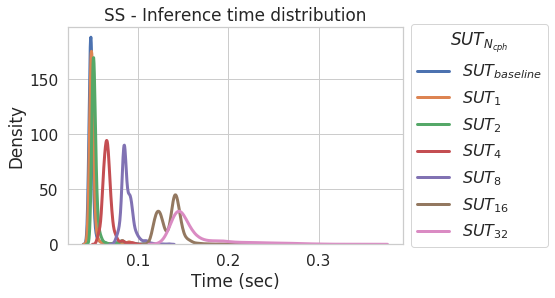

cpumem
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumem-resnet-1-32-SS-1-1/mlperf_log_trace.json'

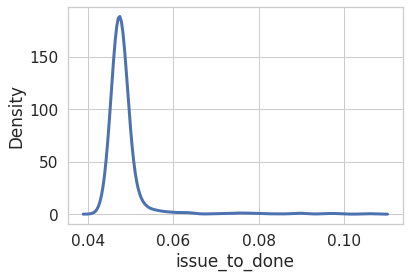

In [117]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for sc in ['none','cpumem','cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-1',
          sc+'-resnet-2-32-SS-1-1',
             sc+'-resnet-4-32-SS-1-1',
               sc+'-resnet-8-32-SS-1-1',
          sc+'-resnet-16-32-SS-1-1',
          sc+'-resnet-32-32-SS-1-1']
    
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = legend[x])
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1

    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = legend[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('SS - Inference time distribution')
    plt.xlabel('Time (sec)')
    plt.ylabel('Density')
    plt.savefig('ss-itd.pdf',bbox_inches='tight')  
    plt.show()

cpumemory
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-re

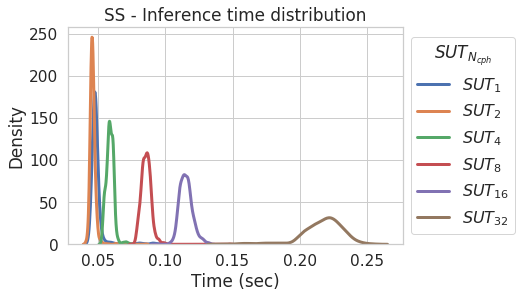

In [118]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for sc in ['cpumemory']:
    print(sc)
    SCEN=[sc+'-resnet-1-32-SS-1-1',
          sc+'-resnet-2-32-SS-1-1',
             sc+'-resnet-4-32-SS-1-1',
               sc+'-resnet-8-32-SS-1-1',
          sc+'-resnet-16-32-SS-1-1',
          sc+'-resnet-32-32-SS-1-1']
    
    x=0
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/cpumemory-resnet-1-32-SS-1-1/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["Sample"])]
#     df1.reset_index(drop=True,inplace=True)
#     sns.distplot(df1['issue_to_done'], hist = False, kde = True,
#                      kde_kws = {'linewidth': 3},
#                      label = legend[x])
# #     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#     x=x+1

    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = legend[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('SS - Inference time distribution')
    plt.xlabel('Time (sec)')
    plt.ylabel('Density')
    plt.savefig('ss-itd-cpumem.pdf',bbox_inches='tight')  
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-32-32-SS-1-1/mlperf_log_trace.json'

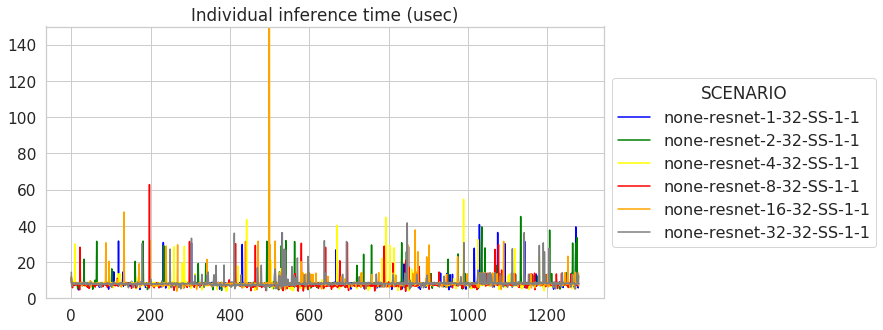

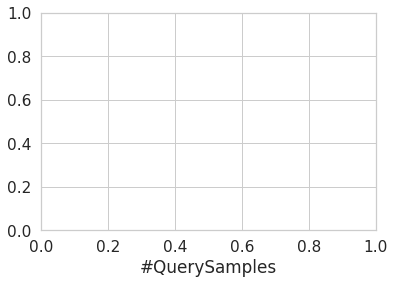

In [95]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['1']:
    SCEN=[
        'none-resnet-1-32-SS-'+batch+'-1',
          'none-resnet-2-32-SS-'+batch+'-1',
                'none-resnet-4-32-SS-'+batch+'-1',
               'none-resnet-8-32-SS-'+batch+'-1',
          'none-resnet-16-32-SS-'+batch+'-1',
          'none-resnet-32-32-SS-'+batch+'-1'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        df1.reset_index(drop=True,inplace=True)
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
        ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-16-32-SS

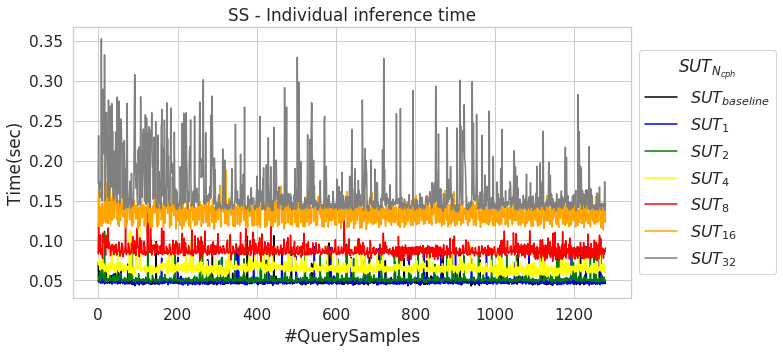

In [121]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for batch in ['1']:
    SCEN=[
        'none-resnet-1-32-SS-'+batch+'-1',
          'none-resnet-2-32-SS-'+batch+'-1',
                'none-resnet-4-32-SS-'+batch+'-1',
               'none-resnet-8-32-SS-'+batch+'-1',
          'none-resnet-16-32-SS-'+batch+'-1',
          'none-resnet-32-32-SS-'+batch+'-1'
    ]
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
    x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
        ax.set_title('SS - Individual inference time');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('#QuerySamples')
    plt.ylabel('Time(sec)')
    plt.savefig('ss-iit.pdf',bbox_inches='tight')
    plt.show()
    

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1294
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-SS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1280
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/ex

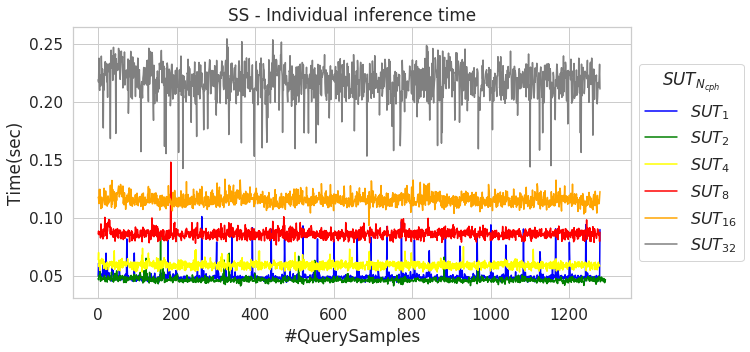

In [122]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for batch in ['1']:
    SCEN=[
        'cpumemory-resnet-1-32-SS-'+batch+'-1',
          'cpumemory-resnet-2-32-SS-'+batch+'-1',
                'cpumemory-resnet-4-32-SS-'+batch+'-1',
               'cpumemory-resnet-8-32-SS-'+batch+'-1',
          'cpumemory-resnet-16-32-SS-'+batch+'-1',
          'cpumemory-resnet-32-32-SS-'+batch+'-1'
    ]
    x=0
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-SS-1-1/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["Sample"])]
#     df1.reset_index(drop=True,inplace=True)
#     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
# #     ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
#     x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
        df1.reset_index(drop=True,inplace=True)
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x])
        ax.set_title('SS - Individual inference time');
#         ax.set(ylim=(0, 150))
        x=x+1
    plt.legend(prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('#QuerySamples')
    plt.ylabel('Time(sec)')
    plt.savefig('ss-iit-cpumem.pdf',bbox_inches='tight')
    plt.show()
    

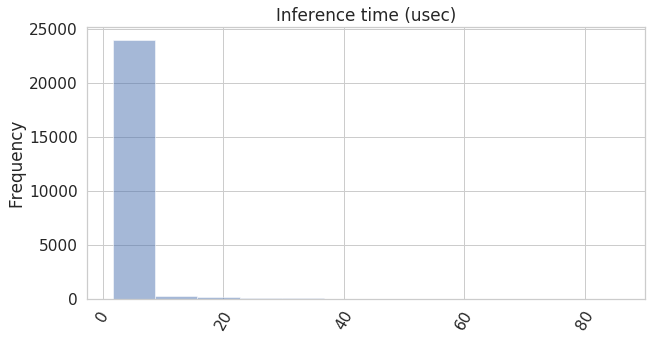

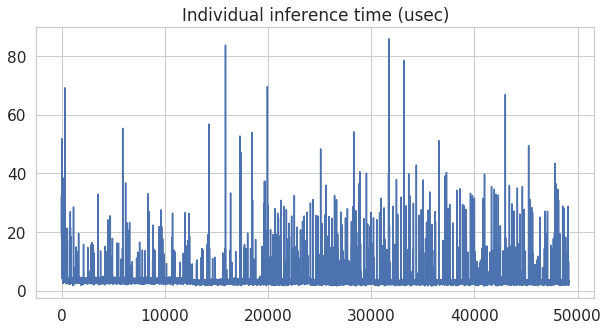

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

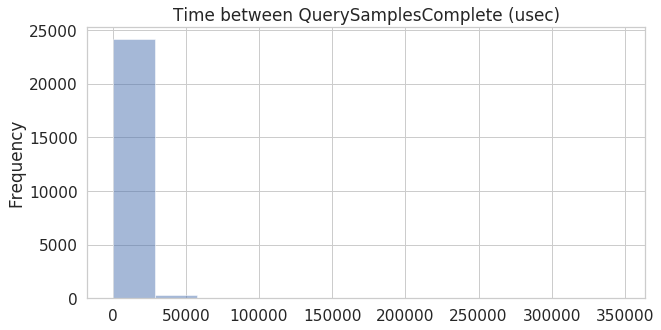

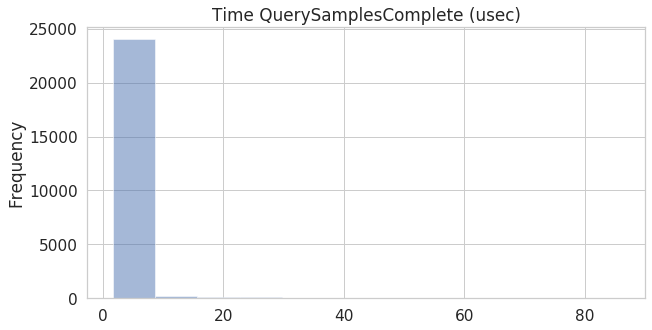

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');